# Neural Networks with Keras

In [2]:
from __future__ import print_function
import random
import numpy as np
import pandas as pd
from math import sin

# pip install keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD   # Stochastic Gradient Descent

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score as cv

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 8)

## Neural Network Regression

### Polynomial Regression

Let's train a neural network on a few different shapes. First we start with a polynomial (a cubic).

In [3]:
# Create some data

def f(x):
    return x ** 3 - 5 * x + 12 + random.random()

X = np.linspace(-1, 1, 1000).reshape(-1, 1)
y = np.array(list(map(f, X)))

print(X.shape, y.shape)

(1000, 1) (1000, 1)


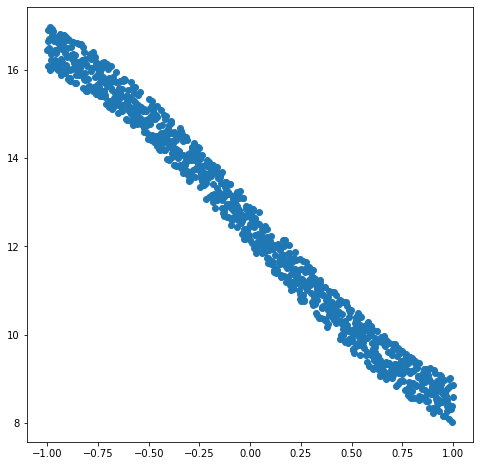

In [4]:
plt.scatter(X, y)

In [5]:
# Define a Feed Forward NN
model = Sequential()
model.add(Dense(5, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='linear', input_shape=(5,)))

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.01))

In [6]:
# Train the model
print('Training...')
loss = model.fit(X, y, epochs=150, validation_split=0.1, 
                 batch_size=128, verbose=False)
print(loss.history['loss'][-1])
print("Done")

Training...
0.08562874794006348
Done


32/32 [==============================] - 0s 732us/step


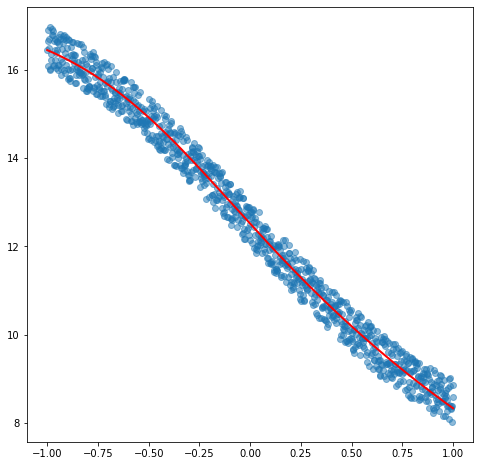

MSE 0.08603441441505781


In [7]:
# Plot the predictions
predictions = model.predict(X)

plt.scatter(X, y, alpha=0.5)
plt.plot(X, predictions, color='r', linewidth=2)
plt.show()
print("MSE", mean_squared_error(predictions, y))

### Sine Regression

In [8]:
# Sine data
X = np.linspace(0, 2 * np.pi, 500).reshape(-1,1)
y = np.sin(X)

print(X.shape, y.shape)

(500, 1) (500, 1)


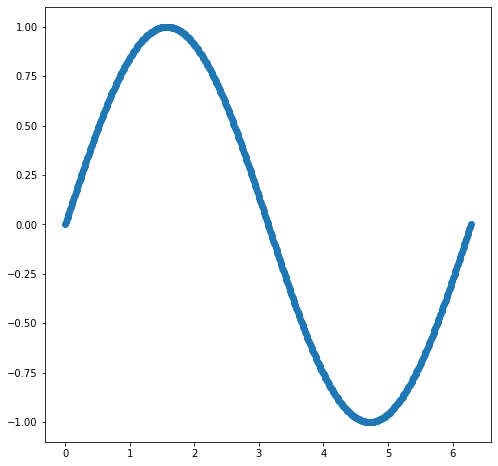

In [9]:
plt.scatter(X, y)

In [10]:
#Create the model
model = Sequential()
model.add(Dense(5, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='linear', input_shape=(5,)))

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.01))

### Train the Model

In [11]:
print('Training..')
loss = model.fit(X, y, epochs=150, validation_split=0.1, 
                 batch_size=128, verbose=False)
print(loss.history['loss'][-1])
print('Complete')

Training..
0.11823279410600662
Complete


16/16 [==============================] - 0s 772us/step


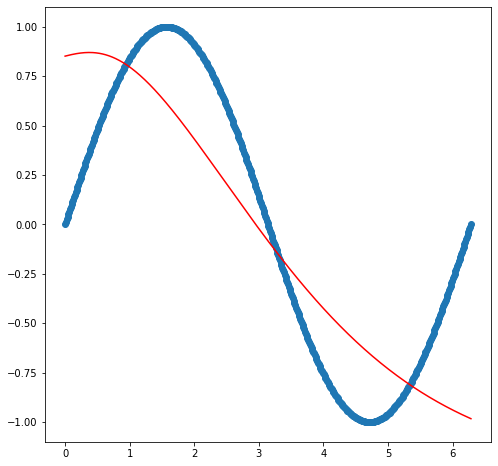

MSE 0.15052480182548386


In [12]:
# Plot the predictions
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, color='r')
plt.show()
print("MSE", mean_squared_error(predictions, y))

Text(0.5, 1.0, 'MSE by Epoch')

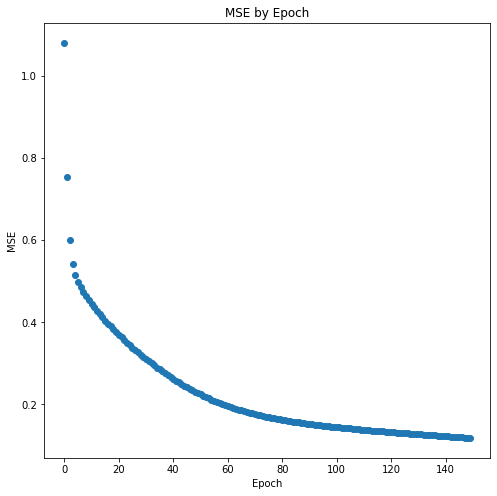

In [13]:
# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])

# plt.scatter(range(len(loss.history['val_loss'])), loss.history['val_loss'], color='red')

plt.xlabel('Epoch')
plt.ylabel('MSE')

plt.title('MSE by Epoch')

### Train longer

If we train for more epochs, we can get a better regression.

(1000, 1) (1000, 1)
Training..
0.039982330054044724
Complete
32/32 [==============================] - 0s 778us/step


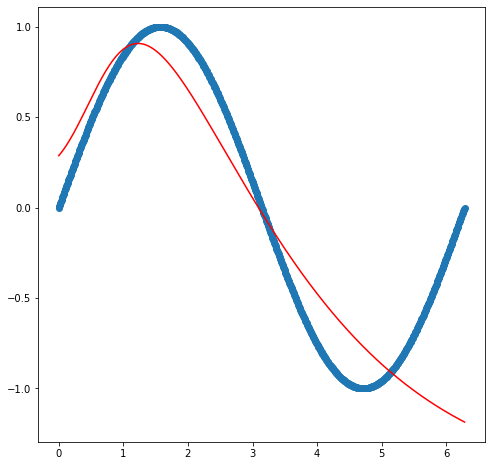

MSE 0.10765070936293375


In [14]:
X = np.linspace(0, 2 * np.pi, 1000).reshape(-1,1)
y = np.sin(X)

print(X.shape, y.shape)

model = Sequential()
model.add(Dense(5, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='linear', input_shape=(5,)))

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.05))

print('Training..')
loss = model.fit(X, y, epochs=250, validation_split=0.1, 
                 batch_size=256, verbose=False)
print(loss.history['loss'][-1])
print('Complete')

# Plot
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, color='r')
plt.show()
print("MSE", mean_squared_error(predictions, y))

We can take a closer look at the error per training epoch.

Text(0.5, 1.0, 'MSE by Epoch')

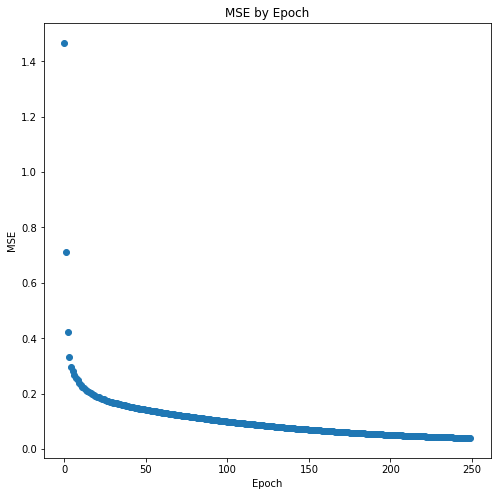

In [15]:
# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch')

### Exercise: Perform regression on the following data
Hints:
* Try adding a hidden layer
* Try lowering the learning rate and using more epochs

In [16]:
def f(x):
    return x ** 2 * np.sin(x**2)

# Sine data
X = np.linspace(2, np.pi, 1000).reshape(-1,1)
y = np.array(list(map(f, X)))

print(X.shape, y.shape)

(1000, 1) (1000, 1)


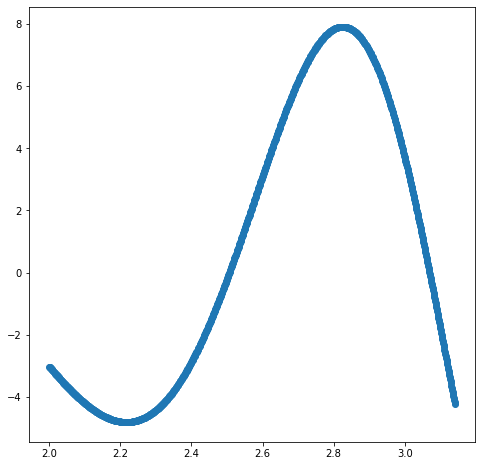

In [17]:
plt.scatter(X, y)

In [18]:
# Solution


Training..
Epoch 1/10000
8/8 [==============================] - 0s 14ms/step - loss: 24.7840 - val_loss: 5.4165
Epoch 2/10000
8/8 [==============================] - 0s 4ms/step - loss: 22.8909 - val_loss: 7.8338
Epoch 3/10000
8/8 [==============================] - 0s 4ms/step - loss: 22.7141 - val_loss: 9.1404
Epoch 4/10000
8/8 [==============================] - 0s 4ms/step - loss: 22.6884 - val_loss: 9.3759
Epoch 5/10000
8/8 [==============================] - 0s 4ms/step - loss: 22.5030 - val_loss: 4.1726
Epoch 6/10000
8/8 [==============================] - 0s 4ms/step - loss: 22.6550 - val_loss: 8.5653
Epoch 7/10000
8/8 [==============================] - 0s 4ms/step - loss: 22.0149 - val_loss: 4.9336
Epoch 8/10000
8/8 [==============================] - 0s 4ms/step - loss: 21.8823 - val_loss: 9.7342
Epoch 9/10000
8/8 [==============================] - 0s 3ms/step - loss: 21.4494 - val_loss: 12.9741
Epoch 10/10000
8/8 [==============================] - 0s 4ms/step - loss: 21.4786 - val

8/8 [==============================] - 0s 4ms/step - loss: 1.2156 - val_loss: 58.3281
Epoch 162/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.0918 - val_loss: 57.9094
Epoch 163/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5050 - val_loss: 57.8434
Epoch 164/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.4313 - val_loss: 56.7397
Epoch 165/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.9476 - val_loss: 56.9354
Epoch 166/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.5753 - val_loss: 57.9427
Epoch 167/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.4267 - val_loss: 60.5125
Epoch 168/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.2142 - val_loss: 60.9693
Epoch 169/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0189 - val_loss: 61.1989
Epoch 170/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1727 - val_loss: 61.5

8/8 [==============================] - 0s 4ms/step - loss: 3.2041 - val_loss: 57.1555
Epoch 322/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.8813 - val_loss: 58.1811
Epoch 323/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.8885 - val_loss: 58.3825
Epoch 324/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.8915 - val_loss: 56.7465
Epoch 325/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.8809 - val_loss: 57.3791
Epoch 326/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.9356 - val_loss: 57.1048
Epoch 327/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.9105 - val_loss: 57.4316
Epoch 328/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.9205 - val_loss: 58.0921
Epoch 329/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.8875 - val_loss: 58.8138
Epoch 330/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.8839 - val_loss: 58.0

8/8 [==============================] - 0s 4ms/step - loss: 0.6158 - val_loss: 50.0938
Epoch 482/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1122 - val_loss: 56.0341
Epoch 483/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.5223 - val_loss: 48.1471
Epoch 484/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.7359 - val_loss: 46.1553
Epoch 485/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.5512 - val_loss: 45.9271
Epoch 486/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.6798 - val_loss: 48.4891
Epoch 487/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.5489 - val_loss: 47.4251
Epoch 488/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.5662 - val_loss: 48.4764
Epoch 489/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.5691 - val_loss: 48.2715
Epoch 490/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.8650 - val_loss: 48.1

8/8 [==============================] - 0s 3ms/step - loss: 0.4538 - val_loss: 28.3009
Epoch 642/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1738 - val_loss: 35.1694
Epoch 643/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.4519 - val_loss: 28.5063
Epoch 644/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.6369 - val_loss: 29.8362
Epoch 645/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.6052 - val_loss: 31.0665
Epoch 646/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.4318 - val_loss: 32.8392
Epoch 647/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3924 - val_loss: 41.6360
Epoch 648/10000
8/8 [==============================] - 0s 4ms/step - loss: 2.4767 - val_loss: 30.0655
Epoch 649/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.9452 - val_loss: 32.8765
Epoch 650/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.8595 - val_loss: 32.4

8/8 [==============================] - 0s 4ms/step - loss: 0.7343 - val_loss: 25.3943
Epoch 802/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.9021 - val_loss: 25.2087
Epoch 803/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0181 - val_loss: 34.0195
Epoch 804/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0496 - val_loss: 28.1653
Epoch 805/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.7264 - val_loss: 24.2610
Epoch 806/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2595 - val_loss: 28.6093
Epoch 807/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.4898 - val_loss: 24.5684
Epoch 808/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.4758 - val_loss: 25.0554
Epoch 809/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.7680 - val_loss: 27.0200
Epoch 810/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2734 - val_loss: 24.3

8/8 [==============================] - 0s 4ms/step - loss: 0.1775 - val_loss: 23.2449
Epoch 962/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1642 - val_loss: 22.3599
Epoch 963/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.2046 - val_loss: 21.0970
Epoch 964/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.8743 - val_loss: 20.6897
Epoch 965/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.7668 - val_loss: 21.1047
Epoch 966/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.8782 - val_loss: 23.3930
Epoch 967/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2072 - val_loss: 23.2092
Epoch 968/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2430 - val_loss: 19.5640
Epoch 969/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5956 - val_loss: 20.5351
Epoch 970/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.8378 - val_loss: 24.4

8/8 [==============================] - 0s 3ms/step - loss: 1.5940 - val_loss: 23.6631
Epoch 1042/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.6120 - val_loss: 23.8868
Epoch 1043/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1990 - val_loss: 50.9703
Epoch 1044/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.4268 - val_loss: 20.9881
Epoch 1045/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1990 - val_loss: 19.0837
Epoch 1046/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2709 - val_loss: 23.3734
Epoch 1047/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3905 - val_loss: 21.4254
Epoch 1048/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.6260 - val_loss: 21.4048
Epoch 1049/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1492 - val_loss: 22.1510
Epoch 1050/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2018 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 1.1028 - val_loss: 66.7965
Epoch 1200/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0659 - val_loss: 64.9522
Epoch 1201/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0649 - val_loss: 65.4056
Epoch 1202/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0462 - val_loss: 65.8918
Epoch 1203/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0443 - val_loss: 67.2124
Epoch 1204/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0986 - val_loss: 65.6765
Epoch 1205/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0345 - val_loss: 65.0950
Epoch 1206/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1028 - val_loss: 66.6799
Epoch 1207/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0831 - val_loss: 66.9923
Epoch 1208/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1126 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.5020 - val_loss: 17.8536
Epoch 1358/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1551 - val_loss: 18.8284
Epoch 1359/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2060 - val_loss: 17.7537
Epoch 1360/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.2742 - val_loss: 16.9532
Epoch 1361/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1644 - val_loss: 21.5765
Epoch 1362/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1471 - val_loss: 19.5704
Epoch 1363/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1564 - val_loss: 28.2236
Epoch 1364/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.4694 - val_loss: 18.5264
Epoch 1365/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.2221 - val_loss: 23.8803
Epoch 1366/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.4722 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1575 - val_loss: 21.0405
Epoch 1516/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.9009 - val_loss: 20.2792
Epoch 1517/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.4752 - val_loss: 18.3152
Epoch 1518/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1158 - val_loss: 19.0231
Epoch 1519/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1156 - val_loss: 20.2766
Epoch 1520/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1720 - val_loss: 17.5935
Epoch 1521/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.4529 - val_loss: 18.9711
Epoch 1522/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3107 - val_loss: 19.7912
Epoch 1523/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2686 - val_loss: 19.8458
Epoch 1524/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1196 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 0.1148 - val_loss: 17.4453
Epoch 1674/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1067 - val_loss: 17.7464
Epoch 1675/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1109 - val_loss: 20.5283
Epoch 1676/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2927 - val_loss: 18.1507
Epoch 1677/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2331 - val_loss: 21.1039
Epoch 1678/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.4995 - val_loss: 17.3833
Epoch 1679/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1266 - val_loss: 20.1142
Epoch 1680/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.5136 - val_loss: 29.6681
Epoch 1681/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3462 - val_loss: 18.5475
Epoch 1682/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1756 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 0.1084 - val_loss: 17.3814
Epoch 1832/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1035 - val_loss: 17.6216
Epoch 1833/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1082 - val_loss: 17.5809
Epoch 1834/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1046 - val_loss: 18.5426
Epoch 1835/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1681 - val_loss: 20.8686
Epoch 1836/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2216 - val_loss: 17.3752
Epoch 1837/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1247 - val_loss: 17.8764
Epoch 1838/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1579 - val_loss: 17.0209
Epoch 1839/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1075 - val_loss: 17.5219
Epoch 1840/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1126 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1698 - val_loss: 15.6847
Epoch 1990/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2116 - val_loss: 15.8974
Epoch 1991/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.4478 - val_loss: 17.0170
Epoch 1992/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1516 - val_loss: 15.9939
Epoch 1993/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1048 - val_loss: 16.3020
Epoch 1994/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1045 - val_loss: 15.4156
Epoch 1995/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3827 - val_loss: 15.0790
Epoch 1996/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3742 - val_loss: 16.4399
Epoch 1997/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1290 - val_loss: 16.2224
Epoch 1998/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1123 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 0.1034 - val_loss: 16.1956
Epoch 2148/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1362 - val_loss: 16.2579
Epoch 2149/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1291 - val_loss: 15.9122
Epoch 2150/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1057 - val_loss: 16.9238
Epoch 2151/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.2280 - val_loss: 16.6470
Epoch 2152/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3360 - val_loss: 15.9670
Epoch 2153/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2806 - val_loss: 18.1034
Epoch 2154/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2409 - val_loss: 15.1433
Epoch 2155/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2224 - val_loss: 15.7156
Epoch 2156/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1226 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 0.0978 - val_loss: 15.1463
Epoch 2306/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1076 - val_loss: 15.3675
Epoch 2307/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0981 - val_loss: 14.8204
Epoch 2308/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1996 - val_loss: 14.8525
Epoch 2309/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1115 - val_loss: 15.3213
Epoch 2310/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0992 - val_loss: 15.3910
Epoch 2311/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0977 - val_loss: 14.7251
Epoch 2312/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1901 - val_loss: 14.7677
Epoch 2313/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1058 - val_loss: 14.5910
Epoch 2314/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1656 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0989 - val_loss: 14.9486
Epoch 2464/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1057 - val_loss: 15.0994
Epoch 2465/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0987 - val_loss: 14.2923
Epoch 2466/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1806 - val_loss: 14.5146
Epoch 2467/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1392 - val_loss: 14.7268
Epoch 2468/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1011 - val_loss: 15.0302
Epoch 2469/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1035 - val_loss: 15.0584
Epoch 2470/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1177 - val_loss: 15.1197
Epoch 2471/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1528 - val_loss: 14.6494
Epoch 2472/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1232 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 0.2123 - val_loss: 14.6136
Epoch 2622/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0996 - val_loss: 14.4871
Epoch 2623/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1025 - val_loss: 14.4972
Epoch 2624/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0984 - val_loss: 14.6705
Epoch 2625/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0979 - val_loss: 14.4440
Epoch 2626/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0976 - val_loss: 13.6057
Epoch 2627/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1339 - val_loss: 13.9001
Epoch 2628/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1246 - val_loss: 14.0613
Epoch 2629/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1527 - val_loss: 13.5021
Epoch 2630/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3328 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1018 - val_loss: 14.0384
Epoch 2780/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1033 - val_loss: 13.5227
Epoch 2781/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2168 - val_loss: 13.9769
Epoch 2782/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1670 - val_loss: 13.0685
Epoch 2783/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3897 - val_loss: 13.5273
Epoch 2784/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1842 - val_loss: 14.1777
Epoch 2785/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1158 - val_loss: 13.5052
Epoch 2786/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1907 - val_loss: 13.1688
Epoch 2787/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.2248 - val_loss: 14.1396
Epoch 2788/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1273 - val_l

8/8 [==============================] - 0s 5ms/step - loss: 0.0953 - val_loss: 13.6545
Epoch 2938/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0952 - val_loss: 14.8676
Epoch 2939/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1669 - val_loss: 13.2196
Epoch 2940/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1682 - val_loss: 13.0883
Epoch 2941/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1494 - val_loss: 12.9560
Epoch 2942/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2876 - val_loss: 14.1679
Epoch 2943/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0988 - val_loss: 14.1537
Epoch 2944/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0994 - val_loss: 13.8859
Epoch 2945/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1014 - val_loss: 15.4105
Epoch 2946/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.3841 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0947 - val_loss: 13.5985
Epoch 3096/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0953 - val_loss: 13.6450
Epoch 3097/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0990 - val_loss: 13.8323
Epoch 3098/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0954 - val_loss: 13.5098
Epoch 3099/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0967 - val_loss: 14.1232
Epoch 3100/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1580 - val_loss: 16.1158
Epoch 3101/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3517 - val_loss: 15.4022
Epoch 3102/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.2382 - val_loss: 13.2532
Epoch 3103/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1002 - val_loss: 13.2875
Epoch 3104/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1202 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1343 - val_loss: 12.8229
Epoch 3254/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1698 - val_loss: 13.6738
Epoch 3255/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0957 - val_loss: 13.1780
Epoch 3256/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1030 - val_loss: 13.8262
Epoch 3257/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1038 - val_loss: 14.4368
Epoch 3258/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1388 - val_loss: 15.6857
Epoch 3259/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1732 - val_loss: 13.6758
Epoch 3260/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1099 - val_loss: 13.0092
Epoch 3261/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1152 - val_loss: 12.9504
Epoch 3262/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1271 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1573 - val_loss: 13.1345
Epoch 3412/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1022 - val_loss: 15.2893
Epoch 3413/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1314 - val_loss: 14.4860
Epoch 3414/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1883 - val_loss: 12.6653
Epoch 3415/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0983 - val_loss: 12.9253
Epoch 3416/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0953 - val_loss: 12.1349
Epoch 3417/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1599 - val_loss: 12.6279
Epoch 3418/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0962 - val_loss: 12.8260
Epoch 3419/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1321 - val_loss: 13.2618
Epoch 3420/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0951 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 0.2177 - val_loss: 13.1147
Epoch 3570/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1638 - val_loss: 12.7012
Epoch 3571/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0977 - val_loss: 12.4683
Epoch 3572/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1076 - val_loss: 12.7366
Epoch 3573/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0955 - val_loss: 14.0561
Epoch 3574/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1376 - val_loss: 12.3074
Epoch 3575/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1251 - val_loss: 12.0763
Epoch 3576/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0990 - val_loss: 12.7473
Epoch 3577/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0998 - val_loss: 12.7150
Epoch 3578/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0964 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 0.0958 - val_loss: 12.8015
Epoch 3728/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0956 - val_loss: 13.9516
Epoch 3729/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1365 - val_loss: 12.3716
Epoch 3730/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0937 - val_loss: 12.5147
Epoch 3731/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0934 - val_loss: 13.3713
Epoch 3732/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1169 - val_loss: 12.7882
Epoch 3733/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0978 - val_loss: 12.9781
Epoch 3734/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1001 - val_loss: 13.4608
Epoch 3735/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1292 - val_loss: 14.3061
Epoch 3736/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3001 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.3956 - val_loss: 11.9526
Epoch 3886/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.2472 - val_loss: 10.7368
Epoch 3887/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.4498 - val_loss: 12.2769
Epoch 3888/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1051 - val_loss: 11.7389
Epoch 3889/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0970 - val_loss: 12.2957
Epoch 3890/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0937 - val_loss: 13.4216
Epoch 3891/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1204 - val_loss: 12.2242
Epoch 3892/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1011 - val_loss: 13.3830
Epoch 3893/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1431 - val_loss: 12.0141
Epoch 3894/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1049 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0932 - val_loss: 11.9750
Epoch 4044/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0946 - val_loss: 11.6386
Epoch 4045/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1150 - val_loss: 11.9179
Epoch 4046/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0966 - val_loss: 11.9585
Epoch 4047/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0926 - val_loss: 12.0082
Epoch 4048/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0931 - val_loss: 11.7349
Epoch 4049/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1139 - val_loss: 11.7501
Epoch 4050/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0966 - val_loss: 11.9111
Epoch 4051/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0928 - val_loss: 12.1788
Epoch 4052/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0977 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1614 - val_loss: 11.9958
Epoch 4202/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2119 - val_loss: 12.2903
Epoch 4203/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1031 - val_loss: 12.0791
Epoch 4204/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1045 - val_loss: 11.6905
Epoch 4205/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1000 - val_loss: 11.3987
Epoch 4206/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0949 - val_loss: 11.9830
Epoch 4207/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0948 - val_loss: 11.7668
Epoch 4208/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0938 - val_loss: 11.9992
Epoch 4209/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0945 - val_loss: 12.0066
Epoch 4210/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0991 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1502 - val_loss: 10.9126
Epoch 4360/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2094 - val_loss: 12.4023
Epoch 4361/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1179 - val_loss: 11.9217
Epoch 4362/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1495 - val_loss: 13.5580
Epoch 4363/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1763 - val_loss: 12.8119
Epoch 4364/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1324 - val_loss: 11.7974
Epoch 4365/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0920 - val_loss: 11.8320
Epoch 4366/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0935 - val_loss: 11.7596
Epoch 4367/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1048 - val_loss: 11.6683
Epoch 4368/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0919 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0921 - val_loss: 11.7035
Epoch 4518/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0930 - val_loss: 11.6146
Epoch 4519/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0920 - val_loss: 11.3813
Epoch 4520/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0913 - val_loss: 11.4274
Epoch 4521/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0917 - val_loss: 12.1812
Epoch 4522/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0940 - val_loss: 11.5856
Epoch 4523/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0927 - val_loss: 11.2715
Epoch 4524/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0916 - val_loss: 11.4646
Epoch 4525/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0936 - val_loss: 13.5371
Epoch 4526/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2339 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 0.0980 - val_loss: 11.1155
Epoch 4676/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0964 - val_loss: 11.3805
Epoch 4677/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0917 - val_loss: 12.0378
Epoch 4678/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1074 - val_loss: 11.3351
Epoch 4679/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0924 - val_loss: 11.3271
Epoch 4680/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0926 - val_loss: 11.8253
Epoch 4681/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1131 - val_loss: 10.5045
Epoch 4682/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1180 - val_loss: 11.0454
Epoch 4683/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0931 - val_loss: 11.3190
Epoch 4684/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0919 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0992 - val_loss: 11.0227
Epoch 4834/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0927 - val_loss: 13.1855
Epoch 4835/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1377 - val_loss: 10.9896
Epoch 4836/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0949 - val_loss: 11.5844
Epoch 4837/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0949 - val_loss: 11.2650
Epoch 4838/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0918 - val_loss: 11.2510
Epoch 4839/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0979 - val_loss: 11.0898
Epoch 4840/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0909 - val_loss: 11.7804
Epoch 4841/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1083 - val_loss: 10.7643
Epoch 4842/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0954 - val_l

Epoch 4992/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0929 - val_loss: 10.9046
Epoch 4993/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0908 - val_loss: 11.1249
Epoch 4994/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0919 - val_loss: 10.4722
Epoch 4995/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1157 - val_loss: 10.6952
Epoch 4996/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0929 - val_loss: 10.5867
Epoch 4997/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1110 - val_loss: 10.8253
Epoch 4998/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0924 - val_loss: 10.8557
Epoch 4999/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0913 - val_loss: 10.3454
Epoch 5000/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1499 - val_loss: 11.0706
Epoch 5001/10000
8/8 [==============================] - 0s 4ms/step - los

8/8 [==============================] - 0s 3ms/step - loss: 0.1271 - val_loss: 10.5391
Epoch 5151/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1186 - val_loss: 10.9889
Epoch 5152/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0911 - val_loss: 11.2997
Epoch 5153/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0929 - val_loss: 10.6812
Epoch 5154/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0908 - val_loss: 10.7499
Epoch 5155/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0905 - val_loss: 10.6994
Epoch 5156/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0921 - val_loss: 10.5742
Epoch 5157/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0924 - val_loss: 10.8199
Epoch 5158/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0907 - val_loss: 11.0993
Epoch 5159/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0918 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0982 - val_loss: 10.8696
Epoch 5309/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0916 - val_loss: 10.7144
Epoch 5310/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0905 - val_loss: 10.6661
Epoch 5311/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0904 - val_loss: 10.7184
Epoch 5312/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0913 - val_loss: 10.5948
Epoch 5313/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0921 - val_loss: 11.2879
Epoch 5314/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1151 - val_loss: 10.7434
Epoch 5315/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0913 - val_loss: 11.5703
Epoch 5316/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0981 - val_loss: 10.6558
Epoch 5317/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0908 - val_l

Epoch 5467/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0910 - val_loss: 10.3499
Epoch 5468/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0904 - val_loss: 10.8442
Epoch 5469/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0912 - val_loss: 10.3567
Epoch 5470/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1028 - val_loss: 9.8157
Epoch 5471/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1396 - val_loss: 10.5803
Epoch 5472/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0913 - val_loss: 10.6150
Epoch 5473/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0912 - val_loss: 10.2779
Epoch 5474/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0908 - val_loss: 11.0289
Epoch 5475/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0974 - val_loss: 10.2601
Epoch 5476/10000
8/8 [==============================] - 0s 3ms/step - loss

Epoch 5626/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1048 - val_loss: 10.3805
Epoch 5627/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0912 - val_loss: 10.5636
Epoch 5628/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0908 - val_loss: 10.3638
Epoch 5629/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0906 - val_loss: 10.4038
Epoch 5630/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0945 - val_loss: 10.4519
Epoch 5631/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0913 - val_loss: 10.8526
Epoch 5632/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1103 - val_loss: 10.4796
Epoch 5633/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0911 - val_loss: 10.6931
Epoch 5634/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0922 - val_loss: 10.4941
Epoch 5635/10000
8/8 [==============================] - 0s 4ms/step - los

Epoch 5785/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0905 - val_loss: 10.2382
Epoch 5786/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0902 - val_loss: 10.0979
Epoch 5787/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0968 - val_loss: 10.0669
Epoch 5788/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0949 - val_loss: 9.7617
Epoch 5789/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1020 - val_loss: 10.3400
Epoch 5790/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0918 - val_loss: 10.9839
Epoch 5791/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0982 - val_loss: 10.3381
Epoch 5792/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0914 - val_loss: 10.1836
Epoch 5793/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0968 - val_loss: 12.7881
Epoch 5794/10000
8/8 [==============================] - 0s 4ms/step - loss

Epoch 5944/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0901 - val_loss: 10.2173
Epoch 5945/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0901 - val_loss: 10.1893
Epoch 5946/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0916 - val_loss: 10.1256
Epoch 5947/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0900 - val_loss: 9.1623
Epoch 5948/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1988 - val_loss: 8.4802
Epoch 5949/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.3385 - val_loss: 10.2898
Epoch 5950/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1505 - val_loss: 10.3087
Epoch 5951/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0901 - val_loss: 10.4207
Epoch 5952/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0919 - val_loss: 11.6329
Epoch 5953/10000
8/8 [==============================] - 0s 4ms/step - loss:

Epoch 6024/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0905 - val_loss: 10.3693
Epoch 6025/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0909 - val_loss: 11.4563
Epoch 6026/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1093 - val_loss: 12.1925
Epoch 6027/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2510 - val_loss: 10.0653
Epoch 6028/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0905 - val_loss: 9.4183
Epoch 6029/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1313 - val_loss: 10.1848
Epoch 6030/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0921 - val_loss: 9.7728
Epoch 6031/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0955 - val_loss: 10.2066
Epoch 6032/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0893 - val_loss: 10.3346
Epoch 6033/10000
8/8 [==============================] - 0s 4ms/step - loss:

Epoch 6104/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0925 - val_loss: 9.9474
Epoch 6105/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0896 - val_loss: 10.0330
Epoch 6106/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0899 - val_loss: 10.1409
Epoch 6107/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0894 - val_loss: 10.0683
Epoch 6108/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0909 - val_loss: 9.7673
Epoch 6109/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1057 - val_loss: 10.2086
Epoch 6110/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0903 - val_loss: 10.5303
Epoch 6111/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1052 - val_loss: 9.7395
Epoch 6112/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0911 - val_loss: 9.9420
Epoch 6113/10000
8/8 [==============================] - 0s 3ms/step - loss: 0

Epoch 6184/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0899 - val_loss: 9.6891
Epoch 6185/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0946 - val_loss: 9.9563
Epoch 6186/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0889 - val_loss: 9.8104
Epoch 6187/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0894 - val_loss: 9.7327
Epoch 6188/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0920 - val_loss: 8.4398
Epoch 6189/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2371 - val_loss: 9.9242
Epoch 6190/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1064 - val_loss: 9.0106
Epoch 6191/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1364 - val_loss: 9.7751
Epoch 6192/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0946 - val_loss: 9.7431
Epoch 6193/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0913

8/8 [==============================] - 0s 4ms/step - loss: 0.3148 - val_loss: 10.0597
Epoch 6265/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0911 - val_loss: 10.0514
Epoch 6266/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0893 - val_loss: 9.9138
Epoch 6267/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0973 - val_loss: 9.9587
Epoch 6268/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0899 - val_loss: 10.6440
Epoch 6269/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1052 - val_loss: 11.5267
Epoch 6270/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1687 - val_loss: 13.2204
Epoch 6271/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1289 - val_loss: 11.8001
Epoch 6272/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1012 - val_loss: 9.9545
Epoch 6273/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0901 - val_loss

8/8 [==============================] - 0s 3ms/step - loss: 0.0914 - val_loss: 9.7425
Epoch 6425/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0889 - val_loss: 9.9034
Epoch 6426/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0903 - val_loss: 9.7436
Epoch 6427/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0926 - val_loss: 9.4980
Epoch 6428/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1068 - val_loss: 9.8941
Epoch 6429/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0903 - val_loss: 9.3212
Epoch 6430/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0989 - val_loss: 10.0122
Epoch 6431/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0907 - val_loss: 10.1733
Epoch 6432/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0934 - val_loss: 9.6572
Epoch 6433/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0893 - val_loss: 9.

8/8 [==============================] - 0s 4ms/step - loss: 0.1008 - val_loss: 9.6062
Epoch 6585/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0893 - val_loss: 9.5464
Epoch 6586/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0888 - val_loss: 9.7044
Epoch 6587/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0890 - val_loss: 9.6212
Epoch 6588/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0893 - val_loss: 9.6226
Epoch 6589/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0929 - val_loss: 9.7624
Epoch 6590/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0903 - val_loss: 9.5717
Epoch 6591/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0889 - val_loss: 9.4842
Epoch 6592/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0967 - val_loss: 9.2483
Epoch 6593/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1166 - val_loss: 9.29

8/8 [==============================] - 0s 4ms/step - loss: 0.0895 - val_loss: 9.4029
Epoch 6745/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0905 - val_loss: 9.6038
Epoch 6746/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0916 - val_loss: 9.7403
Epoch 6747/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0932 - val_loss: 11.1616
Epoch 6748/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1624 - val_loss: 9.4412
Epoch 6749/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0901 - val_loss: 10.2862
Epoch 6750/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1189 - val_loss: 9.6233
Epoch 6751/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0894 - val_loss: 9.6271
Epoch 6752/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0885 - val_loss: 9.3394
Epoch 6753/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0963 - val_loss: 9.

8/8 [==============================] - 0s 4ms/step - loss: 0.0888 - val_loss: 9.3802
Epoch 6905/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0897 - val_loss: 9.3903
Epoch 6906/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0896 - val_loss: 9.4092
Epoch 6907/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0900 - val_loss: 9.1756
Epoch 6908/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0930 - val_loss: 9.2851
Epoch 6909/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0893 - val_loss: 9.6288
Epoch 6910/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0890 - val_loss: 9.1859
Epoch 6911/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0930 - val_loss: 9.5983
Epoch 6912/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0888 - val_loss: 9.4968
Epoch 6913/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0898 - val_loss: 9.01

8/8 [==============================] - 0s 4ms/step - loss: 0.1300 - val_loss: 8.6608
Epoch 7065/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1280 - val_loss: 9.3716
Epoch 7066/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0952 - val_loss: 8.9654
Epoch 7067/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0954 - val_loss: 9.6111
Epoch 7068/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0882 - val_loss: 9.3090
Epoch 7069/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0884 - val_loss: 9.4882
Epoch 7070/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0882 - val_loss: 10.7391
Epoch 7071/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1071 - val_loss: 11.2195
Epoch 7072/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1521 - val_loss: 13.2558
Epoch 7073/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2007 - val_loss: 1

8/8 [==============================] - 0s 4ms/step - loss: 0.0893 - val_loss: 9.1701
Epoch 7225/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0879 - val_loss: 9.0779
Epoch 7226/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0884 - val_loss: 9.3386
Epoch 7227/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0881 - val_loss: 9.3305
Epoch 7228/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0881 - val_loss: 9.1037
Epoch 7229/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0941 - val_loss: 9.6925
Epoch 7230/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0929 - val_loss: 9.3111
Epoch 7231/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0920 - val_loss: 9.2137
Epoch 7232/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0881 - val_loss: 9.0913
Epoch 7233/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0891 - val_loss: 10.6

8/8 [==============================] - 0s 4ms/step - loss: 0.0896 - val_loss: 9.2896
Epoch 7385/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0898 - val_loss: 9.0404
Epoch 7386/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0881 - val_loss: 9.2703
Epoch 7387/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0950 - val_loss: 8.8365
Epoch 7388/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0891 - val_loss: 8.9339
Epoch 7389/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0886 - val_loss: 9.9924
Epoch 7390/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1089 - val_loss: 9.2327
Epoch 7391/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0899 - val_loss: 10.0435
Epoch 7392/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1149 - val_loss: 8.4822
Epoch 7393/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0941 - val_loss: 9.4

8/8 [==============================] - 0s 3ms/step - loss: 0.0878 - val_loss: 8.4650
Epoch 7545/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1003 - val_loss: 7.9063
Epoch 7546/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2333 - val_loss: 9.7010
Epoch 7547/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0895 - val_loss: 9.1066
Epoch 7548/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0915 - val_loss: 8.6241
Epoch 7549/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0937 - val_loss: 9.1903
Epoch 7550/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0880 - val_loss: 9.0372
Epoch 7551/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0895 - val_loss: 8.7689
Epoch 7552/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0912 - val_loss: 9.3354
Epoch 7553/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0931 - val_loss: 9.08

8/8 [==============================] - 0s 4ms/step - loss: 0.0900 - val_loss: 8.7646
Epoch 7705/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1001 - val_loss: 8.8153
Epoch 7706/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0937 - val_loss: 8.7185
Epoch 7707/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1022 - val_loss: 8.3670
Epoch 7708/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1132 - val_loss: 9.1420
Epoch 7709/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0879 - val_loss: 8.9569
Epoch 7710/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0878 - val_loss: 9.2445
Epoch 7711/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0894 - val_loss: 8.9703
Epoch 7712/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0889 - val_loss: 8.9935
Epoch 7713/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0877 - val_loss: 9.05

8/8 [==============================] - 0s 4ms/step - loss: 0.1201 - val_loss: 8.7038
Epoch 7865/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0894 - val_loss: 8.7797
Epoch 7866/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0884 - val_loss: 8.8914
Epoch 7867/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0874 - val_loss: 8.9660
Epoch 7868/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0881 - val_loss: 8.8556
Epoch 7869/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0892 - val_loss: 10.1949
Epoch 7870/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1257 - val_loss: 9.6709
Epoch 7871/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0966 - val_loss: 8.7062
Epoch 7872/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0884 - val_loss: 8.8358
Epoch 7873/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0876 - val_loss: 8.8

8/8 [==============================] - 0s 3ms/step - loss: 0.0880 - val_loss: 8.8168
Epoch 8025/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0886 - val_loss: 8.7190
Epoch 8026/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0877 - val_loss: 9.0122
Epoch 8027/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0875 - val_loss: 8.9090
Epoch 8028/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0879 - val_loss: 9.4709
Epoch 8029/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1142 - val_loss: 8.7755
Epoch 8030/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0933 - val_loss: 8.9233
Epoch 8031/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0874 - val_loss: 8.6409
Epoch 8032/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0901 - val_loss: 8.5382
Epoch 8033/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0895 - val_loss: 8.55

8/8 [==============================] - 0s 3ms/step - loss: 0.1161 - val_loss: 8.7386
Epoch 8185/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0914 - val_loss: 9.0555
Epoch 8186/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0915 - val_loss: 8.5733
Epoch 8187/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0889 - val_loss: 8.6761
Epoch 8188/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0875 - val_loss: 8.4301
Epoch 8189/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0920 - val_loss: 8.7144
Epoch 8190/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0884 - val_loss: 8.5072
Epoch 8191/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0898 - val_loss: 8.9474
Epoch 8192/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0878 - val_loss: 8.6715
Epoch 8193/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0876 - val_loss: 10.7

8/8 [==============================] - 0s 3ms/step - loss: 0.0907 - val_loss: 8.5130
Epoch 8345/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0887 - val_loss: 8.3525
Epoch 8346/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0897 - val_loss: 8.7063
Epoch 8347/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0879 - val_loss: 8.6937
Epoch 8348/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0880 - val_loss: 8.4905
Epoch 8349/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0871 - val_loss: 8.7731
Epoch 8350/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0893 - val_loss: 8.5575
Epoch 8351/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0873 - val_loss: 8.3321
Epoch 8352/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0894 - val_loss: 8.4524
Epoch 8353/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0885 - val_loss: 8.42

8/8 [==============================] - 0s 3ms/step - loss: 0.0874 - val_loss: 9.6927
Epoch 8505/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1129 - val_loss: 19.5659
Epoch 8506/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1903 - val_loss: 9.3003
Epoch 8507/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0933 - val_loss: 9.2487
Epoch 8508/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0936 - val_loss: 8.7222
Epoch 8509/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0878 - val_loss: 8.6334
Epoch 8510/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0875 - val_loss: 8.6190
Epoch 8511/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0886 - val_loss: 12.6911
Epoch 8512/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.2441 - val_loss: 8.2401
Epoch 8513/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0973 - val_loss: 8.

8/8 [==============================] - 0s 4ms/step - loss: 0.0870 - val_loss: 8.2332
Epoch 8665/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0898 - val_loss: 8.3032
Epoch 8666/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0997 - val_loss: 8.3079
Epoch 8667/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0890 - val_loss: 8.2936
Epoch 8668/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0884 - val_loss: 10.3826
Epoch 8669/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1002 - val_loss: 10.1938
Epoch 8670/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1587 - val_loss: 11.5444
Epoch 8671/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1448 - val_loss: 8.3882
Epoch 8672/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0903 - val_loss: 8.9549
Epoch 8673/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0919 - val_loss: 8

8/8 [==============================] - 0s 4ms/step - loss: 0.0874 - val_loss: 9.1868
Epoch 8825/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0981 - val_loss: 7.8670
Epoch 8826/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0989 - val_loss: 8.4987
Epoch 8827/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0880 - val_loss: 8.4564
Epoch 8828/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0879 - val_loss: 9.1298
Epoch 8829/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0926 - val_loss: 9.8610
Epoch 8830/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0978 - val_loss: 8.4160
Epoch 8831/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0872 - val_loss: 8.3718
Epoch 8832/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0880 - val_loss: 8.2542
Epoch 8833/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0872 - val_loss: 8.53

8/8 [==============================] - 0s 3ms/step - loss: 0.0930 - val_loss: 8.1925
Epoch 8985/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0896 - val_loss: 7.8048
Epoch 8986/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0887 - val_loss: 8.8749
Epoch 8987/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0919 - val_loss: 9.1274
Epoch 8988/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0969 - val_loss: 8.2849
Epoch 8989/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0867 - val_loss: 8.3469
Epoch 8990/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0868 - val_loss: 8.2662
Epoch 8991/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0866 - val_loss: 8.4052
Epoch 8992/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0868 - val_loss: 8.4177
Epoch 8993/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0874 - val_loss: 8.27

8/8 [==============================] - 0s 4ms/step - loss: 0.0885 - val_loss: 8.0343
Epoch 9145/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0905 - val_loss: 8.0976
Epoch 9146/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0870 - val_loss: 8.1303
Epoch 9147/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0871 - val_loss: 8.1795
Epoch 9148/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0893 - val_loss: 8.1796
Epoch 9149/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0873 - val_loss: 9.2076
Epoch 9150/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0906 - val_loss: 7.8081
Epoch 9151/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0904 - val_loss: 8.1486
Epoch 9152/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0873 - val_loss: 8.1887
Epoch 9153/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0871 - val_loss: 8.35

8/8 [==============================] - 0s 3ms/step - loss: 0.0864 - val_loss: 8.2455
Epoch 9305/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0868 - val_loss: 8.0537
Epoch 9306/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0870 - val_loss: 7.9335
Epoch 9307/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0903 - val_loss: 7.9871
Epoch 9308/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0875 - val_loss: 8.1842
Epoch 9309/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0869 - val_loss: 8.1971
Epoch 9310/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0871 - val_loss: 8.8892
Epoch 9311/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0899 - val_loss: 9.6638
Epoch 9312/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1092 - val_loss: 9.5869
Epoch 9313/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1369 - val_loss: 7.95

8/8 [==============================] - 0s 3ms/step - loss: 0.0932 - val_loss: 8.6850
Epoch 9465/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0936 - val_loss: 8.1459
Epoch 9466/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0876 - val_loss: 8.0229
Epoch 9467/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0877 - val_loss: 8.1333
Epoch 9468/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0864 - val_loss: 8.3127
Epoch 9469/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0913 - val_loss: 7.9780
Epoch 9470/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0878 - val_loss: 8.0153
Epoch 9471/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0889 - val_loss: 8.0140
Epoch 9472/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0986 - val_loss: 8.2829
Epoch 9473/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0871 - val_loss: 7.84

8/8 [==============================] - 0s 3ms/step - loss: 0.0909 - val_loss: 7.2041
Epoch 9625/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1429 - val_loss: 8.2215
Epoch 9626/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0919 - val_loss: 8.1644
Epoch 9627/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0900 - val_loss: 7.8378
Epoch 9628/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0864 - val_loss: 7.9519
Epoch 9629/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0863 - val_loss: 7.9908
Epoch 9630/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0863 - val_loss: 8.8531
Epoch 9631/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1055 - val_loss: 11.3775
Epoch 9632/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1220 - val_loss: 7.8852
Epoch 9633/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0881 - val_loss: 7.7

8/8 [==============================] - 0s 3ms/step - loss: 0.0868 - val_loss: 7.8736
Epoch 9785/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0865 - val_loss: 8.0048
Epoch 9786/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0884 - val_loss: 8.0027
Epoch 9787/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0867 - val_loss: 8.0259
Epoch 9788/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0863 - val_loss: 9.6296
Epoch 9789/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1060 - val_loss: 7.8752
Epoch 9790/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0893 - val_loss: 8.1475
Epoch 9791/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0905 - val_loss: 7.5905
Epoch 9792/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0903 - val_loss: 7.7693
Epoch 9793/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0932 - val_loss: 7.72

8/8 [==============================] - 0s 3ms/step - loss: 0.0869 - val_loss: 7.7602
Epoch 9945/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0892 - val_loss: 7.6952
Epoch 9946/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0902 - val_loss: 7.9845
Epoch 9947/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0871 - val_loss: 7.9778
Epoch 9948/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0863 - val_loss: 7.7218
Epoch 9949/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0874 - val_loss: 7.8449
Epoch 9950/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0861 - val_loss: 8.5068
Epoch 9951/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0880 - val_loss: 7.8979
Epoch 9952/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0861 - val_loss: 7.9998
Epoch 9953/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0897 - val_loss: 9.28

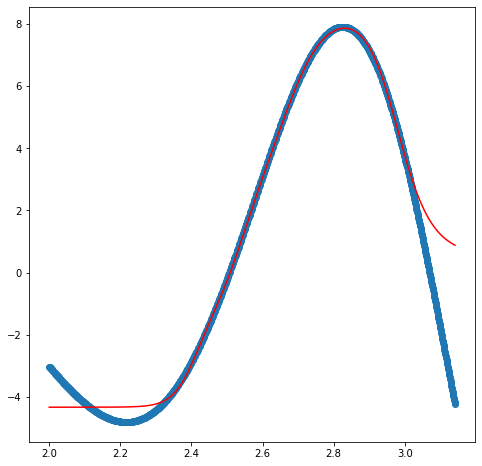

MSE 0.8897529690088913


In [20]:
# Setup your model

model = Sequential()
model.add(Dense(5, activation='tanh', input_shape=(1,)))
model.add(Dense(5, activation='tanh', input_shape=(5,)))
model.add(Dense(1, activation='linear', input_shape=(5,)))


#   Compile the model using MSE as your loss function and an SGD learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.005))

print('Training..')
loss = model.fit(X, y, epochs=10000, validation_split=0.1, 
                 batch_size=128, verbose=True)
print(loss.history['loss'][-1])
print('Complete')

# Plot
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, color='r')
plt.show()
print("MSE", mean_squared_error(predictions, y))

## Classification

We'll start with the Iris dataset (of course).

In [21]:
import sklearn.datasets as datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

# Break each output into indicator cols
y_cat = pd.get_dummies(y).values

print(X.shape, y_cat.shape)

(150, 4) (150, 3)


In [36]:
# Define a model
model = Sequential()

# First layer - input diminsions=k features.
model.add(Dense(4, activation='tanh', input_shape=(4,)))

# Output layer - output_dim=# of output per point (in y).
# Use 'softmax' for class probability. 'linear' for regression
model.add(Dense(3, activation='softmax', input_shape=(4,)))

# Uses categorical_crossentropy and Stochastic Gradient Descent
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01))

In [37]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.1, epochs=500, 
                 batch_size=16, verbose=True)

print(loss.history['loss'][-1])   # displays categorical_crossentropy at last iteration
print("Training complete")

Training...
Epoch 1/500
9/9 [==============================] - 0s 14ms/step - loss: 1.2113 - val_loss: 2.0197
Epoch 2/500
9/9 [==============================] - 0s 3ms/step - loss: 1.1693 - val_loss: 1.9372
Epoch 3/500
9/9 [==============================] - 0s 3ms/step - loss: 1.1354 - val_loss: 1.8556
Epoch 4/500
9/9 [==============================] - 0s 4ms/step - loss: 1.1014 - val_loss: 1.7897
Epoch 5/500
9/9 [==============================] - 0s 3ms/step - loss: 1.0679 - val_loss: 1.7225
Epoch 6/500
9/9 [==============================] - 0s 3ms/step - loss: 1.0368 - val_loss: 1.6630
Epoch 7/500
9/9 [==============================] - 0s 3ms/step - loss: 1.0105 - val_loss: 1.6021
Epoch 8/500
9/9 [==============================] - 0s 3ms/step - loss: 0.9877 - val_loss: 1.5478
Epoch 9/500
9/9 [==============================] - 0s 3ms/step - loss: 0.9680 - val_loss: 1.4899
Epoch 10/500
9/9 [==============================] - 0s 3ms/step - loss: 0.9495 - val_loss: 1.4444
Epoch 11/500
9/9

9/9 [==============================] - 0s 3ms/step - loss: 0.2799 - val_loss: 0.3998
Epoch 168/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2773 - val_loss: 0.4366
Epoch 169/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2736 - val_loss: 0.3592
Epoch 170/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2786 - val_loss: 0.4128
Epoch 171/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2729 - val_loss: 0.4103
Epoch 172/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2733 - val_loss: 0.3901
Epoch 173/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2710 - val_loss: 0.3963
Epoch 174/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2681 - val_loss: 0.4158
Epoch 175/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2652 - val_loss: 0.3732
Epoch 176/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2665 - val_loss: 0.3520
Epoch 177/500
9/9 [=====

Epoch 250/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1878 - val_loss: 0.2976
Epoch 251/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1872 - val_loss: 0.2316
Epoch 252/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1872 - val_loss: 0.2142
Epoch 253/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1870 - val_loss: 0.2746
Epoch 254/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1845 - val_loss: 0.2130
Epoch 255/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1851 - val_loss: 0.3068
Epoch 256/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1834 - val_loss: 0.2728
Epoch 257/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1829 - val_loss: 0.1975
Epoch 258/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1825 - val_loss: 0.2732
Epoch 259/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1838 - val_loss: 0.2816
Epoch 260/

Epoch 415/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1217 - val_loss: 0.2536
Epoch 416/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1229 - val_loss: 0.1490
Epoch 417/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1177 - val_loss: 0.1533
Epoch 418/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1262 - val_loss: 0.2266
Epoch 419/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1202 - val_loss: 0.1648
Epoch 420/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1190 - val_loss: 0.1875
Epoch 421/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1163 - val_loss: 0.2512
Epoch 422/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1217 - val_loss: 0.1483
Epoch 423/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1191 - val_loss: 0.1607
Epoch 424/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1202 - val_loss: 0.1146
Epoch 425/

In [38]:
# Model evaluation

preds  = model.predict(X).argmax(axis=-1)

print('ACCURACY: ', accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', confusion_matrix(y, preds))

5/5 [==============================] - 0s 1ms/step
ACCURACY:  0.9733333333333334
CONFUSION MATRIX:
 [[50  0  0]
 [ 0 46  4]
 [ 0  0 50]]


Text(0.5, 1.0, 'categorical crossentropy by Epoch')

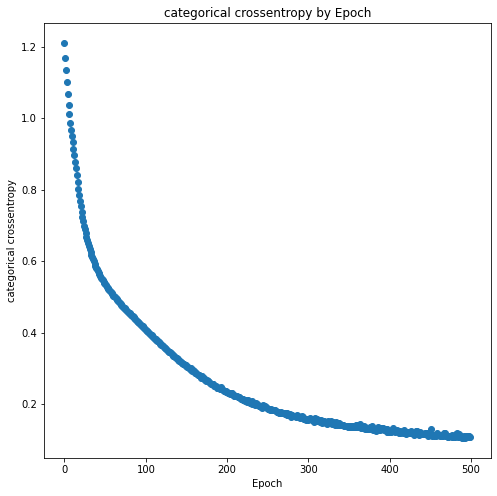

In [39]:
# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('categorical crossentropy')
plt.title('categorical crossentropy by Epoch')

## Abalone data set

In [49]:
columns = ["Sex", "Length", "Diameter", "Height", "Whole Weight",
           "Shucked weight", "Viscera weight", "Shell weight", "Rings" ]
df = pd.read_csv("./data/abalone.data", names=columns)

df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [50]:
df.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

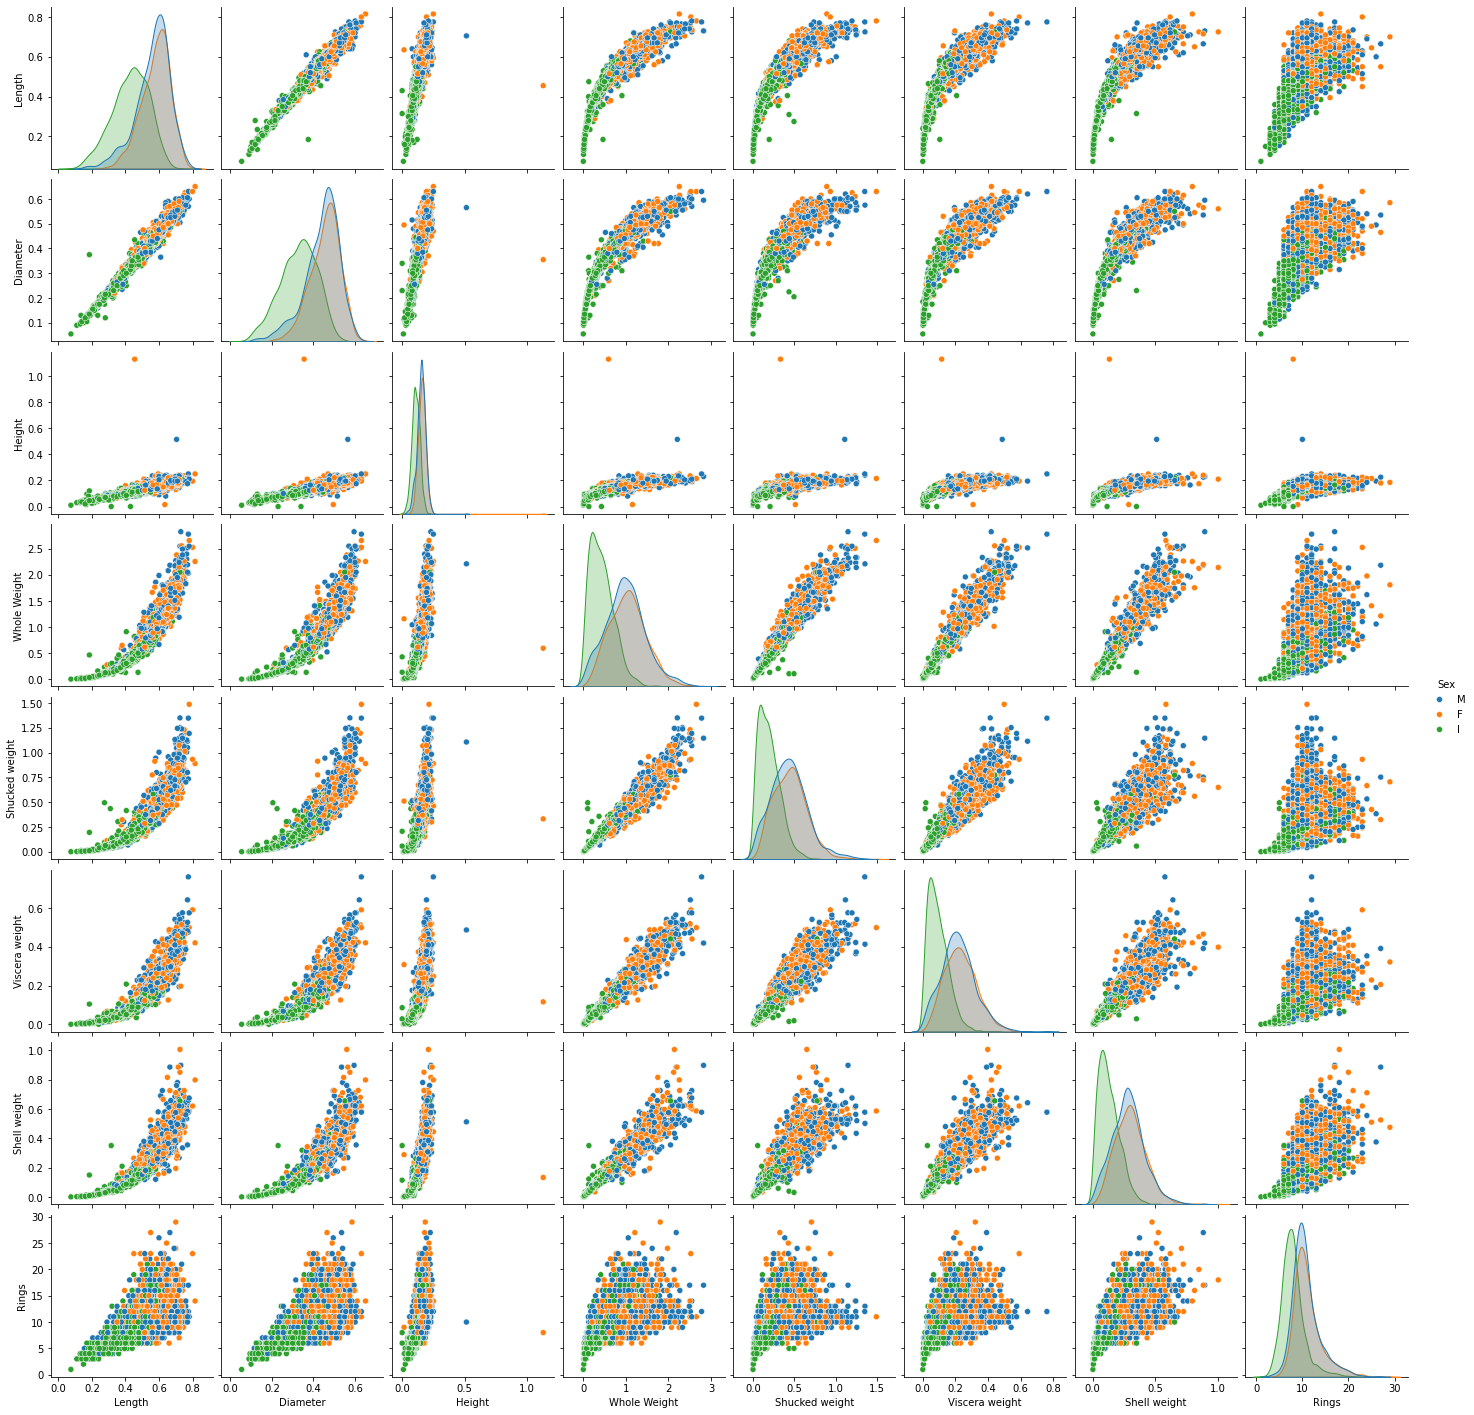

In [51]:
import seaborn as sns
sns.pairplot(data=df, vars=columns[1:], hue="Sex")
plt.show()

In [52]:
d = {'M': 0, 'F': 1, 'I': 2}
df["Sex"] = df["Sex"].apply(lambda x: d[x])

In [53]:
df.describe()

,Sex,Length,Diameter,Height,Whole Weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [54]:
X = np.array(df[columns[1:]])
y = np.array(df["Sex"])
y_cat = pd.get_dummies(y).values

print(X.shape, y_cat.shape)

(4177, 8) (4177, 3)


In [55]:
y_cat

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

In [56]:
# Define a model
model = Sequential()

# input_dim = number of neurons in previous layer.
# output_dim = number of neurons in current layer.

# First layer - input_dim=k features.
model.add(Dense(6, activation='tanh', input_shape=(8,)))

#Second, hidden layer
model.add(Dense(6, activation='tanh', input_shape=(6,)))

# Output layer - output_dim=# of output per point (in y).
# Use 'softmax' for class probability. 'linear' for regression
model.add(Dense(3, activation='softmax', input_shape=(8,)))


# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1))

In [57]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.1, epochs=500, 
                 batch_size=16, verbose=True)

print(loss.history['loss'][-1])   # displays categorical_crossentropy at last iteration
print("Training complete")

Training...
Epoch 1/500
235/235 [==============================] - 1s 1ms/step - loss: 1.0835 - val_loss: 1.0579
Epoch 2/500
235/235 [==============================] - 0s 916us/step - loss: 1.0430 - val_loss: 1.0169
Epoch 3/500
235/235 [==============================] - 0s 951us/step - loss: 1.0017 - val_loss: 0.9742
Epoch 4/500
235/235 [==============================] - 0s 2ms/step - loss: 0.9622 - val_loss: 0.9357
Epoch 5/500
235/235 [==============================] - 0s 931us/step - loss: 0.9328 - val_loss: 0.9024
Epoch 6/500
235/235 [==============================] - 0s 935us/step - loss: 0.9183 - val_loss: 0.8884
Epoch 7/500
235/235 [==============================] - 0s 973us/step - loss: 0.9048 - val_loss: 0.8837
Epoch 8/500
235/235 [==============================] - 0s 1000us/step - loss: 0.9022 - val_loss: 0.9185
Epoch 9/500
235/235 [==============================] - 0s 988us/step - loss: 0.8990 - val_loss: 0.8761
Epoch 10/500
235/235 [==============================] - 0s 1ms/s

Epoch 80/500
235/235 [==============================] - 0s 921us/step - loss: 0.8700 - val_loss: 0.8495
Epoch 81/500
235/235 [==============================] - 0s 953us/step - loss: 0.8713 - val_loss: 0.8519
Epoch 82/500
235/235 [==============================] - 0s 950us/step - loss: 0.8712 - val_loss: 0.8689
Epoch 83/500
235/235 [==============================] - 0s 971us/step - loss: 0.8709 - val_loss: 0.8620
Epoch 84/500
235/235 [==============================] - 0s 922us/step - loss: 0.8724 - val_loss: 0.8489
Epoch 85/500
235/235 [==============================] - 0s 957us/step - loss: 0.8697 - val_loss: 0.8854
Epoch 86/500
235/235 [==============================] - 0s 989us/step - loss: 0.8692 - val_loss: 0.8777
Epoch 87/500
235/235 [==============================] - 0s 935us/step - loss: 0.8698 - val_loss: 0.8605
Epoch 88/500
235/235 [==============================] - 0s 967us/step - loss: 0.8715 - val_loss: 0.8632
Epoch 89/500
235/235 [==============================] - 0s 936us

235/235 [==============================] - 0s 980us/step - loss: 0.8620 - val_loss: 0.8472
Epoch 237/500
235/235 [==============================] - 0s 969us/step - loss: 0.8610 - val_loss: 0.8507
Epoch 238/500
235/235 [==============================] - 0s 991us/step - loss: 0.8626 - val_loss: 0.8465
Epoch 239/500
235/235 [==============================] - 0s 946us/step - loss: 0.8616 - val_loss: 0.8513
Epoch 240/500
235/235 [==============================] - 0s 962us/step - loss: 0.8626 - val_loss: 0.8535
Epoch 241/500
235/235 [==============================] - 0s 977us/step - loss: 0.8639 - val_loss: 0.8566
Epoch 242/500
235/235 [==============================] - 0s 1ms/step - loss: 0.8624 - val_loss: 0.8681
Epoch 243/500
235/235 [==============================] - 0s 966us/step - loss: 0.8618 - val_loss: 0.8481
Epoch 244/500
235/235 [==============================] - 0s 976us/step - loss: 0.8639 - val_loss: 0.8455
Epoch 245/500
235/235 [==============================] - 0s 955us/step 

235/235 [==============================] - 0s 1ms/step - loss: 0.8565 - val_loss: 0.8417
Epoch 393/500
235/235 [==============================] - 0s 976us/step - loss: 0.8563 - val_loss: 0.8718
Epoch 394/500
235/235 [==============================] - 0s 948us/step - loss: 0.8588 - val_loss: 0.8499
Epoch 395/500
235/235 [==============================] - 0s 925us/step - loss: 0.8560 - val_loss: 0.8752
Epoch 396/500
235/235 [==============================] - 0s 998us/step - loss: 0.8579 - val_loss: 0.8457
Epoch 397/500
235/235 [==============================] - 0s 967us/step - loss: 0.8564 - val_loss: 0.8437
Epoch 398/500
235/235 [==============================] - 0s 978us/step - loss: 0.8570 - val_loss: 0.8449
Epoch 399/500
235/235 [==============================] - 0s 969us/step - loss: 0.8585 - val_loss: 0.8508
Epoch 400/500
235/235 [==============================] - 0s 921us/step - loss: 0.8565 - val_loss: 0.8531
Epoch 401/500
235/235 [==============================] - 0s 951us/step 

131/131 [==============================] - 0s 702us/step
ACCURACY:  0.5412975819966483
CONFUSION MATRIX:
 [[410 881 237]
 [323 856 128]
 [210 137 995]]


Text(0.5, 1.0, 'categorical crossentropy by Epoch')

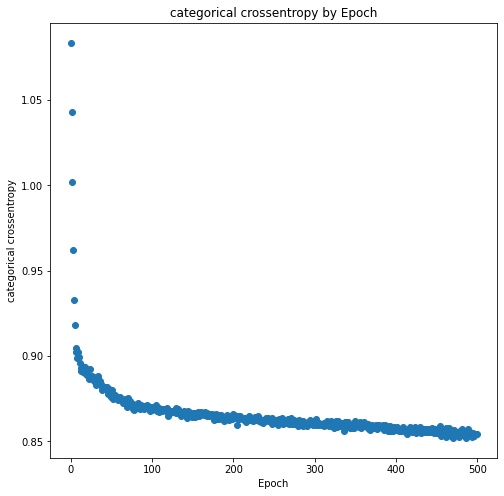

In [58]:
# Model evaluation

preds  = preds  = model.predict(X).argmax(axis=-1)

print('ACCURACY: ', accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', confusion_matrix(y, preds))

# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('categorical crossentropy')
plt.title('categorical crossentropy by Epoch')

## Exercise

Classify the following data ([source](https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope)). You'll need to translate the classes into integers and make dummies. Design a neural network to classify the data and evaluate the results.

In [61]:
names = "fLength fWidth fSize fConc fConc1 fAsym fM3Long fM3Trans fAlpha fDist class".split()
df = pd.read_csv("./data/magic04.data", names=names)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [62]:
# Create a dictionary to change the class to an int
d = {'g': 0, 'h': 1}
df["class"] = df["class"].apply(lambda x: d[x])

In [63]:
# Move create your X, y and y_cat datasets
X = np.array(df[df.columns[:-1]])
y = np.array(df["class"])
y_cat = pd.get_dummies(y).values

In [64]:
# What's their shape?
print(X.shape, y_cat.shape)

(19020, 10) (19020, 2)


In [65]:
# Define a model? Why not!
model = Sequential()

# How many input dimensions does X have?
# What are our output dimensions?
# Build our first layer
model.add(Dense(6,activation='tanh', input_shape=(10,)))

# Choose a value for the hidden layer
model.add(Dense(6,activation='tanh', input_shape=(6,)))
# Create the Output layer - how many output dimensions should you have?

model.add(Dense(2,activation='softmax', input_shape=(6,)))

In [66]:
# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01))

In [68]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.2, epochs=1000, 
                 batch_size=256, verbose=True)

print(loss.history['loss'][-1])   # displays MSE at last iteration
print("Training complete")

Training...
Epoch 1/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3882 - val_loss: 1.3396
Epoch 2/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3858 - val_loss: 1.2400
Epoch 3/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3849 - val_loss: 1.3599
Epoch 4/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3845 - val_loss: 1.3474
Epoch 5/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3851 - val_loss: 1.3049
Epoch 6/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3862 - val_loss: 1.2703
Epoch 7/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3843 - val_loss: 1.2733
Epoch 8/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3852 - val_loss: 1.2861
Epoch 9/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3838 - val_loss: 1.3200
Epoch 10/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3845 - val_

60/60 [==============================] - 0s 1ms/step - loss: 0.3835 - val_loss: 1.3203
Epoch 83/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3839 - val_loss: 1.3177
Epoch 84/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3828 - val_loss: 1.4106
Epoch 85/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3855 - val_loss: 1.1762
Epoch 86/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3840 - val_loss: 1.3173
Epoch 87/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3829 - val_loss: 1.3113
Epoch 88/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3846 - val_loss: 1.3138
Epoch 89/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3833 - val_loss: 1.2908
Epoch 90/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3833 - val_loss: 1.4061
Epoch 91/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3845 - val_loss: 1.2275
Epoc

60/60 [==============================] - 0s 1ms/step - loss: 0.3797 - val_loss: 1.3139
Epoch 243/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3808 - val_loss: 1.2810
Epoch 244/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3803 - val_loss: 1.2919
Epoch 245/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3802 - val_loss: 1.2962
Epoch 246/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3798 - val_loss: 1.2252
Epoch 247/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3802 - val_loss: 1.3666
Epoch 248/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3814 - val_loss: 1.2360
Epoch 249/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3794 - val_loss: 1.2798
Epoch 250/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3791 - val_loss: 1.2485
Epoch 251/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3799 - val_loss: 1.

60/60 [==============================] - 0s 1ms/step - loss: 0.3721 - val_loss: 1.4120
Epoch 403/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3700 - val_loss: 1.0463
Epoch 404/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3747 - val_loss: 1.1876
Epoch 405/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3704 - val_loss: 1.4773
Epoch 406/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3676 - val_loss: 1.4546
Epoch 407/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3727 - val_loss: 0.8225
Epoch 408/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3729 - val_loss: 1.1553
Epoch 409/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3707 - val_loss: 1.2691
Epoch 410/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3730 - val_loss: 1.1819
Epoch 411/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3764 - val_loss: 1.

60/60 [==============================] - 0s 1ms/step - loss: 0.3711 - val_loss: 1.2178
Epoch 563/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3629 - val_loss: 1.2893
Epoch 564/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3658 - val_loss: 1.4125
Epoch 565/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3723 - val_loss: 1.3466
Epoch 566/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3680 - val_loss: 1.1615
Epoch 567/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3667 - val_loss: 0.9115
Epoch 568/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3656 - val_loss: 1.0744
Epoch 569/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3731 - val_loss: 1.3063
Epoch 570/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3591 - val_loss: 1.4129
Epoch 571/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3662 - val_loss: 1.

60/60 [==============================] - 0s 1ms/step - loss: 0.3550 - val_loss: 1.3113
Epoch 723/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3585 - val_loss: 0.7702
Epoch 724/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3606 - val_loss: 1.1780
Epoch 725/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3570 - val_loss: 1.0895
Epoch 726/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3556 - val_loss: 1.3009
Epoch 727/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3548 - val_loss: 1.1071
Epoch 728/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3564 - val_loss: 1.0087
Epoch 729/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3568 - val_loss: 0.8850
Epoch 730/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3579 - val_loss: 1.1755
Epoch 731/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3581 - val_loss: 1.

60/60 [==============================] - 0s 1ms/step - loss: 0.3524 - val_loss: 1.2850
Epoch 883/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3502 - val_loss: 1.3571
Epoch 884/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3553 - val_loss: 0.9835
Epoch 885/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3519 - val_loss: 1.0919
Epoch 886/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3558 - val_loss: 1.2053
Epoch 887/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3506 - val_loss: 0.9307
Epoch 888/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3524 - val_loss: 0.8256
Epoch 889/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3544 - val_loss: 1.2755
Epoch 890/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3552 - val_loss: 1.0570
Epoch 891/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3531 - val_loss: 1.

595/595 [==============================] - 1s 814us/step
ACCURACY:  0.7770241850683491
CONFUSION MATRIX:
 [[12046   286]
 [ 3955  2733]]


Text(0.5, 1.0, 'categorical crossentropy by Epoch')

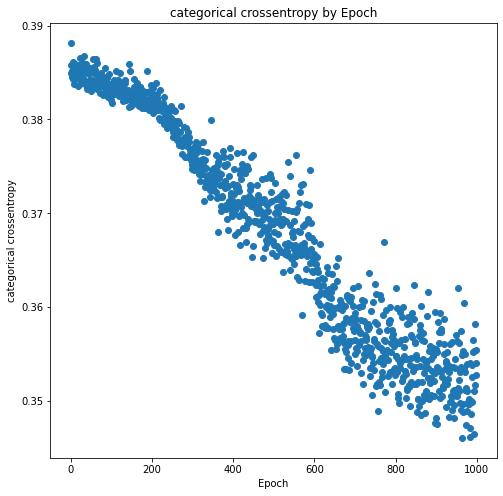

In [69]:
# Model evaluation - maybe accuracy and confusion matrix?

preds  = model.predict(X).argmax(axis=-1)

print('ACCURACY: ', accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', confusion_matrix(y, preds))

# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('categorical crossentropy')
plt.title('categorical crossentropy by Epoch')